# DNN model

In [2]:
#import necessary libraries
import numpy as np
import glob
import cv2 as cv
import matplotlib.pyplot as plt
from random import shuffle
from testCases_v2 import *
from dnn_app_utils_v2 import *

In [3]:
# load the dataset and the labels
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test =  np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [13]:
print(x_train.shape)
print(y_train.shape)
print('============')
print(x_test.shape)
print(y_test.shape)

(576, 4022)
(1, 4022)
(576, 824)
(1, 824)


In [4]:
# normalize the inputs

x_train = x_train / 255
x_test = x_test / 255



In [5]:
# create a three different layers
layers_dims1 = [x_train.shape[0], 20, 7, 5, 1] #3 hidden layers
layers_dims2 = [576,4,1]#single hidden layer
layers_dims3 = [576,45,20,7,6,4,1]#5 hidden layers

In [6]:
# create the model for the dnn model
def L_layer_model(X, Y, layers_dims, learning_rate = 0.1, num_iterations = 3000, print_cost=False):#lr was 0.009
    

    #fix the random initialization
    np.random.seed(1)
    # keep track of cost
    costs = []                         
    
    # Parameters initialization.
   
    parameters = initialize_parameters_deep(layers_dims)
    
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
         
        AL, caches = L_model_forward(X, parameters)
        
        
        # Compute cost.
        
        cost = compute_cost(AL, Y)
        
    
        # Backward propagation.
        
        grads = L_model_backward(AL, Y, caches)
        
 
        # Update parameters.
        
        parameters = update_parameters(parameters, grads, learning_rate=learning_rate)
        
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        #if print_cost and i % 100 == 0:
        costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.692814
Cost after iteration 100: 0.673184
Cost after iteration 200: 0.580521
Cost after iteration 300: 0.546227
Cost after iteration 400: 0.518883
Cost after iteration 500: 0.498712
Cost after iteration 600: 0.481532
Cost after iteration 700: 0.464604
Cost after iteration 800: 0.449190
Cost after iteration 900: 0.435241
Cost after iteration 1000: 0.420324
Cost after iteration 1100: 0.407590
Cost after iteration 1200: 0.396150
Cost after iteration 1300: 0.385649
Cost after iteration 1400: 0.373430
Cost after iteration 1500: 0.363234
Cost after iteration 1600: 0.353028
Cost after iteration 1700: 0.335597
Cost after iteration 1800: 0.325689
Cost after iteration 1900: 0.315463
Cost after iteration 2000: 0.307668
Cost after iteration 2100: 0.295677
Cost after iteration 2200: 0.290859
Cost after iteration 2300: 0.285554
Cost after iteration 2400: 0.263967
Cost after iteration 2500: 0.255053
Cost after iteration 2600: 0.254726
Cost after iteration 2700: 0.243701
Cost

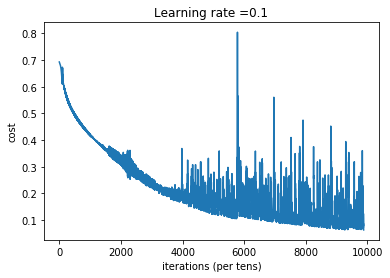

In [14]:
#3 hidden layers
parameters = L_layer_model(x_train, y_train, layers_dims1, num_iterations = 9877, print_cost = True)



### train accuracy

In [16]:
# comparing the predicted value and the true vale
def prediction(x,parameters):
    
    AL, caches = L_model_forward(x, parameters)
    y1 = ( AL > 0.5 )
    return y1
# create a function to calculate the accuracy
def accuracy(y1,y):
    return 100 - (np.mean(np.abs(np.subtract(y,y1),y)) * 100)
prediction(x_train,parameters)
accuracy(prediction(x_train,parameters),y_train)


97.886623570363

### test accuracy

In [9]:
prediction(x_test,y_test,parameters)

92.71844660194175

In [17]:
w1 = parameters['W1']
w2 = parameters['W2']
w3 = parameters['W3']
w4 = parameters['W4']
b1 = parameters['b1']
b2 = parameters['b2']
b3 = parameters['b3']
b4 = parameters['b4']

In [20]:
weights = {'w1':w1, 'w2':w2, 'w3':w3, 'w4':w4}

biases = {'b1':b1, 'b2':b2, 'b3':b3, 'b4':b4}


In [21]:
#save the weights and the biases
np.save('weights.npy',weights)
np.save('biases.npy',biases)

Cost after iteration 0: 0.693337
Cost after iteration 100: 0.655466
Cost after iteration 200: 0.634467
Cost after iteration 300: 0.590531
Cost after iteration 400: 0.511950
Cost after iteration 500: 0.475477
Cost after iteration 600: 0.435930
Cost after iteration 700: 0.463264
Cost after iteration 800: 0.364041
Cost after iteration 900: 0.364191
Cost after iteration 1000: 0.436389
Cost after iteration 1100: 0.319811
Cost after iteration 1200: 0.361179
Cost after iteration 1300: 0.327945
Cost after iteration 1400: 0.308970
Cost after iteration 1500: 0.309790
Cost after iteration 1600: 0.285678
Cost after iteration 1700: 0.286986
Cost after iteration 1800: 0.274609
Cost after iteration 1900: 0.261911
Cost after iteration 2000: 0.256249
Cost after iteration 2100: 0.242201
Cost after iteration 2200: 0.251398
Cost after iteration 2300: 0.236268
Cost after iteration 2400: 0.243863
Cost after iteration 2500: 0.193222
Cost after iteration 2600: 0.203655
Cost after iteration 2700: 0.210245
Cost

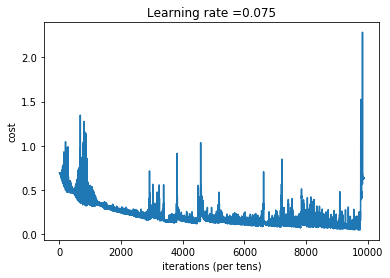

In [9]:
parameters = L_layer_model(x_train, y_train, layers_dims3, num_iterations = 9877, print_cost = True,learning_rate=0.075)